In [11]:
from langchain_ollama.llms import OllamaLLM
from langgraph.graph import StateGraph,START,END
from typing import TypedDict


In [12]:
model = OllamaLLM(model="llama2",temperature=0)

In [13]:
class BasicWorkflow(TypedDict):
    question: str
    answer: str

In [14]:
def AskQuestion(data:BasicWorkflow)-> BasicWorkflow:
    question = data['question']
    prompt = f"Answer the following question {question} in brief."
    answer = model.invoke(prompt)
    data['answer'] = answer
    return data

In [15]:
mygraph = StateGraph(BasicWorkflow)


mygraph.add_node('Ask Question',AskQuestion)
mygraph.add_edge(START,'Ask Question')
mygraph.add_edge('Ask Question',END)

workflow= mygraph.compile()

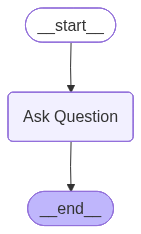

In [16]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [17]:
workflow.invoke({'question':'What is LangGraph?'})

{'question': 'What is LangGraph?',
 'answer': '\nLangGraph is a language-agnostic graph library for Python that provides a simple and efficient way to work with graphs. It was developed by Facebook and is now maintained by the Python Software Foundation.\n\nHere are some key features of LangGraph:\n\n1. Language-agnostic: LangGraph can be used with any programming language, making it a versatile tool for graph-related tasks.\n2. Efficient: LangGraph provides efficient algorithms for common graph operations such as traversals, shortest paths, and network flow.\n3. Simple: LangGraph has a simple and intuitive API that makes it easy to use and integrate into existing projects.\n4. Extensible: LangGraph is designed to be extensible, allowing developers to add custom graph algorithms and data structures as needed.\n5. Support for large graphs: LangGraph is optimized for working with large graphs, making it a good choice for applications that require handling massive amounts of data.\n\nOver